In [1]:
# Importing required libraries 

import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import svm
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading the dataset
finance=pd.read_csv("./targetfirm_prediction_dataset_small.csv")         
finance.drop(['ca','Unnamed: 0'],axis=1,inplace=True)

In [3]:
# Dropping the rows with more than 50% NaN values and imputing mean for the rest of the rows with less than 50% NaN values
perc=50.0
min_count = int(((100-perc)/100)*finance.shape[1]+1)                  
finance=finance.dropna(axis=0,thresh=min_count)
for i in finance.columns[finance.isnull().any(axis=0)]:     # Applying Only on variables with NaN values
    finance[i].fillna(finance[i].mean(),inplace=True)

In [4]:
finance['target'].value_counts()

0.0    188541
1.0      1804
Name: target, dtype: int64

In [5]:
# Exploring the dataset to understand the percentage of 0 and 1 in the target variable
count_0 = len(finance[finance['target']==0.0])
count_1 = len(finance[finance['target']==1.0])
pct_of_0 = count_0/(count_0+count_1)
print("percentage of 0 is", pct_of_0*100)
pct_of_1 = count_1/(count_0+count_1)
print("percentage of 1 is", pct_of_1*100)

percentage of 0 is 99.0522472352833
percentage of 1 is 0.9477527647166986


In [6]:
# Selecting only the required rows
finance=finance.iloc[:,2:]
finance

,target,at,revt,ib,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
0,0.0,701.854,874.255000,18.531000,13.134000,340.212,13.809,2.500000,320.590,204.065000,106.459562,179.987,9.157000,5080.0
1,0.0,710.199,638.721000,-58.939000,12.112000,310.235,34.522,2.200000,286.588,139.603000,106.459562,217.699,4.430000,5080.0
2,0.0,686.621,606.337000,-12.410000,9.930000,294.988,29.154,2.100000,259.954,124.106000,106.459562,164.658,0.797000,5080.0
3,0.0,709.292,651.958000,3.504000,10.286000,301.684,41.010,2.300000,247.245,131.884000,106.459562,248.666,0.000000,5080.0
4,0.0,732.230,747.848000,18.572000,13.033000,314.744,50.338,2.600000,255.477,142.450000,106.459562,227.159,0.000000,5080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224996,0.0,507.122,409.522000,-60.812000,1.212000,319.736,46.522,0.808000,9.078,-153.433000,106.459562,20.790,1.674000,4412.0
224997,0.0,266.811,2674.036063,168.386784,200.648586,140.718,14.501,8.285289,0.536,-1.785000,106.459562,76.534,81.662572,4412.0
225001,0.0,1526.300,1704.000000,123.000000,84.800000,1341.800,14.000,8.285289,263.700,852.295869,106.459562,0.000,0.000000,3440.0
225002,0.0,1602.500,1462.400000,89.700000,82.400000,1407.900,6.800,5.490000,246.800,852.295869,106.459562,0.400,0.000000,3440.0


In [7]:
# Selecting the dependent and independent variables from the dataset
X=finance.iloc[:,2:]
y=finance['target']

In [8]:
# Implementing the model and checking the p-values
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.081397
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.519    
Dependent Variable: target           AIC:              31010.9112
Date:               2022-05-15 21:14 BIC:              31132.7903
No. Observations:   190345           Log-Likelihood:   -15493.   
Df Model:           11               LL-Null:          -10200.   
Df Residuals:       190333           LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
         Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
revt     0.0000     0.0000     11.5317   0.0000    0.0000    0.0000
ib       0.0000     0.0000      1.2164   0.2238   -0.0000

In [9]:
# The p-values for most of the variables are smaller than 0.05, except five variables, therefore, we will remove them.
X=X.drop(['invt','ib','che','dltt','dv'],axis=1)
y=finance['target']

In [10]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.081444
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.520    
Dependent Variable: target           AIC:              31018.9851
Date:               2022-05-15 21:14 BIC:              31090.0812
No. Observations:   190345           Log-Likelihood:   -15502.   
Df Model:           6                LL-Null:          -10200.   
Df Residuals:       190338           LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
         Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
revt     0.0000     0.0000     11.2390   0.0000    0.0000    0.0000
capx    -0.0003     0.0000     -8.1452   0.0000   -0.0004

In [11]:
# Splitting the dataset into training and testing dataframes. We assigned 30% of dataset for testing and 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [12]:
# Finding the accuracy of the model
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [13]:
# Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[56573    11]
 [  519     1]]


In [14]:
# Predict class labels on training data
pred_labels_tr = (logreg.predict(X_train) > 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (logreg.predict(X_test) > 0.5).astype(int)

In [15]:
# Model Performance Summary
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")



---------- Evaluation on Training Data ----------
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    131957
         1.0       0.00      0.00      0.00      1284

    accuracy                           0.99    133241
   macro avg       0.50      0.50      0.50    133241
weighted avg       0.98      0.99      0.99    133241


---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     56584
         1.0       0.08      0.00      0.00       520

    accuracy                           0.99     57104
   macro avg       0.54      0.50      0.50     57104
weighted avg       0.98      0.99      0.99     57104




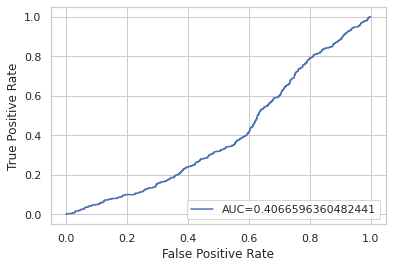

In [16]:
#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [17]:
# We observe the ROC curve to be almost along the baseline. This might be because of the bias in the target variable.